<a href="https://colab.research.google.com/github/Manar0887/Destor-Multazem-Gadeed/blob/main/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
#Importing Requierd Libraries
import pandas as pd
import numpy as np
from itertools import product
import datetime

# For interactive graphics
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns




# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.impute
import sklearn.compose
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


# Magics Funtions
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/e-commerce_marketing.csv', sep="\t" )

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#Exploratory Data Analysis

In [ ]:
# Access the column names
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Get the dimensions of the Data
df.shape

(2240, 29)

In [ ]:
# Get a  summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

from the pervious output ,we can notic that
Dt_Customer that indicates the Date of customer's enrollment with the company
: is object not datetime
income datatype is float


there is missing value in INCOME



In [ ]:
# Generate descriptive statistics for the Data
# Calculate the descriptive statistics and round to 2 decimal places
description = df.describe().round(2)

# Apply color gradient to the descriptive statistics
colored_description = description.style.background_gradient()

# Display the colored descriptive statistics
colored_description

Note: The standard deviation for column Z_CostContact and column Z_Revenue is zero


In [ ]:
df = df.drop(['Z_Revenue', 'Z_CostContact'], axis=1)


## cheak for duplication



In [ ]:
# cheack for duplication in the data
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

[0 rows x 27 columns]

## Number of unique values present in each column



In [ ]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
df.nunique()


ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

#Data cleaning and manipulation






<Axes: >

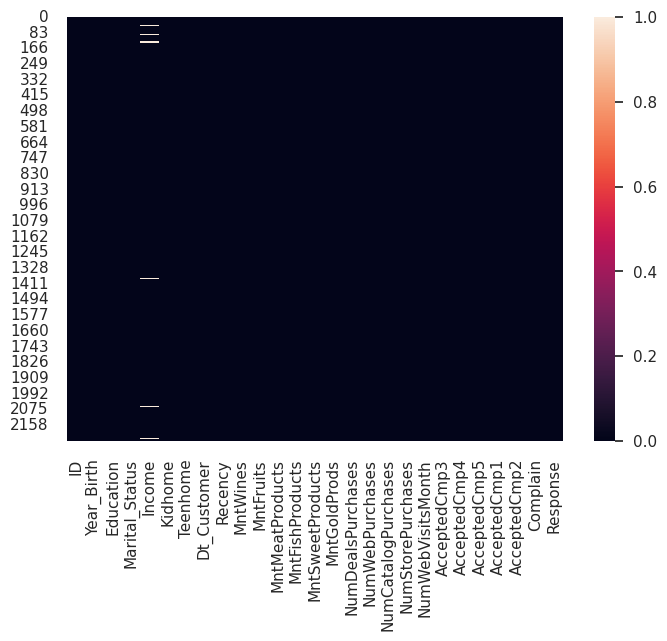

In [ ]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())
# Set the tick color


In [ ]:
# Count the number of missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

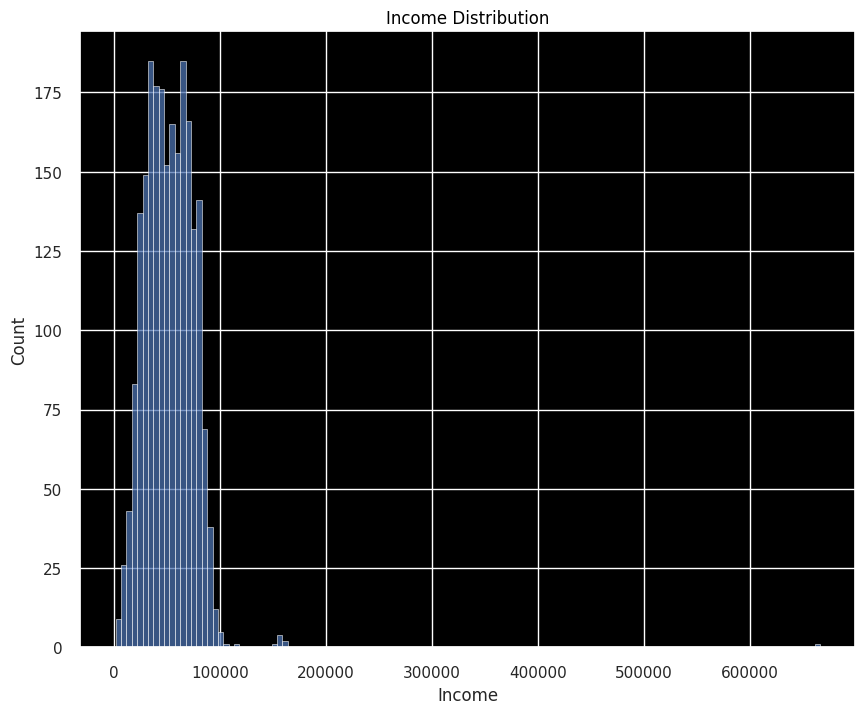

In [ ]:
# Setting up colors preferences
palette_color = sns.color_palette("Paired")
# Set the style to a dark background with white grid lines
sns.set(style="darkgrid", rc={"axes.facecolor": "black"})


# Choose a custom color palette
colors = ["#FF0000", "#00FF00", "#0000FF"]  # Replace with your desired colors
# Set the plot size
plt.figure(figsize=(10, 8))

# Plot the distribution of the data
sns.histplot(df['Income'])

# Set the title color
plt.title("Income Distribution", color='black')





# Set the grid color
#plt.grid(color='white')

# Display the plot
plt.show()

In [ ]:
# Box plot
fig_box = go.Figure()
fig_box.add_trace(go.Box(x=df['Income'], marker_color="#ff7f0e"))
fig_box.update_layout(
    template="plotly_dark",  # Set the template to "plotly_dark" for a black background
    xaxis=dict(title="Income"),
)


# Handel Missing Values

In [ ]:
df.fillna(df.median(numeric_only=True).round(1), inplace=True)

## Outliers

In [ ]:
columns_numeric = ['Year_Birth',
               'Income', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [ ]:
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set the template font
pio.templates['plotly_dark']['layout']['font'] = {'family': 'verdana', 'size': 16, 'color': 'white'}

# Set up plotly
plot_rows = 2
plot_cols = 7
fig = make_subplots(rows=plot_rows, cols=plot_cols, shared_yaxes=False)

# Add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Box(
            y=df[columns_numeric[x]].values,
            name=df[columns_numeric].columns[x]
        ), row=i, col=j)
        x += 1

# Update layout
fig.update_layout(
    width=1500,
    height=800,
    template='plotly_dark'
)

# Show the plot
fig.show()


Observations
In our examined graphs:


- We detect a possible outlier in the 'Income' column with a value of 666666, we will assume that it is an erroneous data or a TYPO, we will analyze how much the average of this column impacts and we will substitute the average without this value.

- We detected 3 possible outliers in the 'Year_Birth' column with values from 1900 to 1893, which, taking into account the value 1900, would have a difference of 96 years with the Year_Birth of the minor in the dataset, without adding the years until he could buy. We'll assume it's a bad data or a TYPO, analyze how much the average of this column impacts, and substitute with the average without these values.

## Transformation and preprocessing of categorical data


In [ ]:
print(df['Education'].value_counts(), '\n')
print(df['Marital_Status'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


"Based on the  data, it seems that the majority of Customers in this dataset have completed their education up to the Graduation level, with a count of 1127. This is followed by 486 individuals who have attained a PhD, 370 individuals with a Master's degree, 203 individuals with a 2nd Cycle degree, and finally, 54 individuals with a Basic education level."

 Observations
In our examined columns:


- We don't need so many variables, with 'Under Graduate' ,graduate 'Post Graduate' they will be useful for our cases in the 'Education' column

- We don't need so many variables, with 'Relationship' and 'Single' they will be useful for our cases in the 'Marital_Status' column
In the next step, we will replace

#### Education

In [ ]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
import plotly.express as px

fig = px.pie(df, names="Education", hole=0.4, template="plotly_dark")
fig.update_layout(title="Education Distribution")
fig.show()


In [ ]:
df['Education'].value_counts()

Graduate         1127
Postgraduate      856
Undergraduate     257
Name: Education, dtype: int64

#### Marital_Status

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Based on the marital status graph, most customers are already married.



In [ ]:
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Relation", "Together":"Relation", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [ ]:
import plotly.express as px

fig = px.pie(df, names="Marital_Status", hole=0.4, template="plotly_dark")
fig.update_layout(title="Distribution of Marital Status")
fig.show()


## Convert categorical variable to datetime




In [ ]:
df['Marital_Status'].value_counts()

Relation    1444
Alone        796
Name: Marital_Status, dtype: int64

In [ ]:
df['Dt_Customer'].nunique


<bound method IndexOpsMixin.nunique of 0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object>

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
max_date = df['Dt_Customer'].max().date()

# Display the maximum date
print('max_date : ' , max_date)

max_date :  2014-12-06


<ipython-input-888-908b0dab76c2>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



# creating feature





In [ ]:
#Creating a feature ("Customer_days") of the number of days the customers started to shop in the store relative to the last recorded date
df['Day_Engaged'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

df['Day_Engaged']


0       971
1       125
2       472
3        65
4       321
       ... 
2235    541
2236     61
2237    315
2238    316
2239    782
Name: Day_Engaged, Length: 2240, dtype: int64

##AGE

In [ ]:
df['Age']= 2015 - df['Year_Birth']

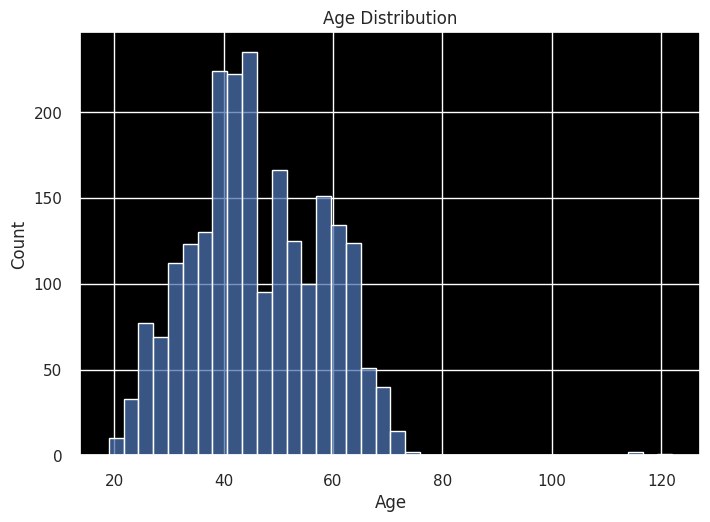

In [ ]:
#colors = ["#FF0000"]#, "#00FF00", "#0000FF"]  # Replace with your desired colors
ax = plt.axes()
sns.histplot(
    data=df,
    x="Age",
    fill=True,
    ax=ax,

)
ax.set_title("Age Distribution")
plt.show()

## Union of Kidhome and Teenhome variables in a single column


In [ ]:
df['Kidhome'].value_counts()


0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [ ]:
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

 Observations
In our examined columns:


- We don't need two columns to represent the presence of children in the household, so we'll merge them into a single variable called 'children'.

##  Combining different dataframe into a single column to reduce the number of dimension


## Children

In [ ]:
df['Children'] = df['Kidhome'] + df['Teenhome']


In [ ]:
df['Has_Children']  = np.where(df.Children> 0, 1, 0)

In [ ]:
fig =  px.pie (df, names = "Children", hole = 0.4, template = "plotly_dark")
fig.show ()

## Spent

In [ ]:
#Create another feature "Money_Spent" indicating the total amount spent by the customer in various categories
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['Total_Expense'] = df[mnt_cols].sum(axis=1)

In [ ]:
# Changing some feature name for clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

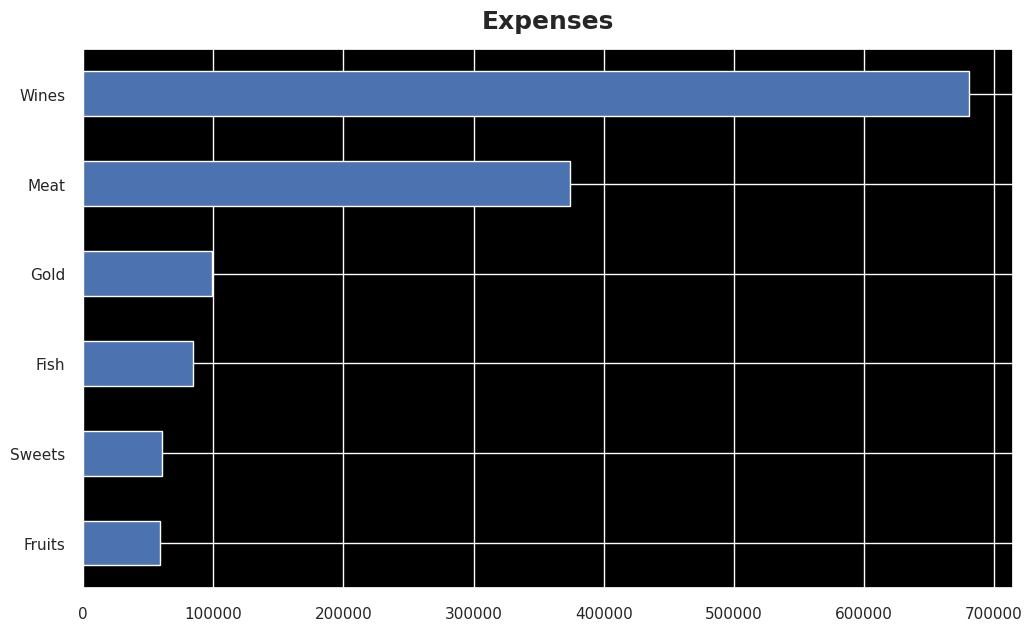

In [ ]:
plt.figure(figsize=(12,7))
ax = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
  x_value = rect.get_width()
y_value = rect.get_y() + rect.get_height() / 2


##Total_purchase

In [ ]:
# Store Purchases' information
Purchases = df.loc[:,'NumWebPurchases':'NumWebVisitsMonth']

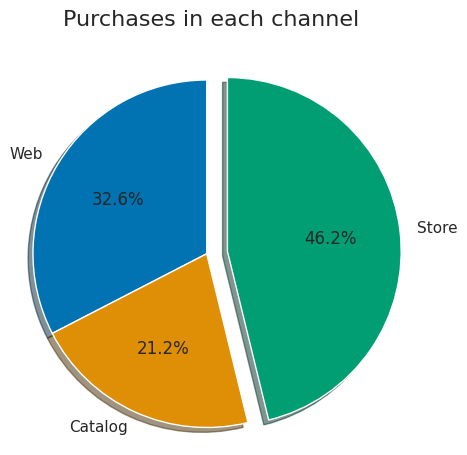

NumStorePurchases      46.184524
NumWebPurchases        32.581989
NumCatalogPurchases    21.233486
dtype: float64


In [ ]:
total_purchase_each = np.sum(Purchases.iloc[:,:-1], axis=0)
percent_purchase_each = total_purchase_each / np.sum(total_purchase_each) * 100

def plot_pie_chart(labels, sizes: pd.Series, title):
    fig, ax = plt.subplots()
    fig.suptitle(title, fontsize=16)
    fig.set_size_inches(5, 5)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%',
           colors=sns.color_palette('colorblind'),
           explode=[0, 0, 0.12],  # Adding space to one slice
           shadow=True, startangle=90)

    ax.axis('equal')
    plt.show()
    print(sizes.sort_values(ascending=False))

plot_pie_chart(labels=['Web', 'Catalog', 'Store'], sizes=percent_purchase_each, title='Purchases in each channel')


##Total camp

In [ ]:
Purchases = df.loc[:,'NumWebPurchases':'NumWebVisitsMonth']

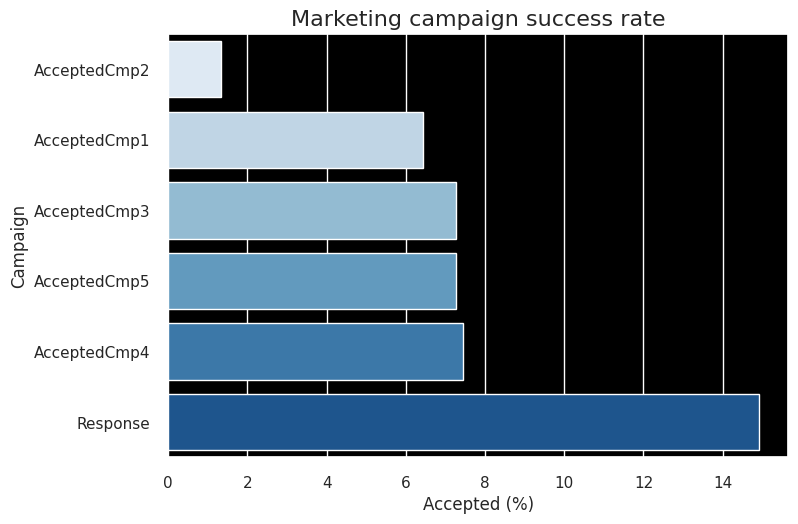

In [ ]:
# calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100,
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette="Blues")
plt.xlabel('Accepted (%)')
plt.ylabel('Campaign')
plt.title('Marketing campaign success rate', size=16);

In [ ]:
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
df['Total_AccCmp'] = df[campaigns_cols].sum(axis=1)

In [ ]:
acc_cmp_1 = pd.Series(data=['Yes' if i > 0 else 'No' for i in df['Total_AccCmp']]).value_counts().to_frame().reset_index().rename(columns={0:'Total','index':'Acc_Cmp'})
acc_cmp_1['%'] = round(acc_cmp_1['Total']/acc_cmp_1['Total'].sum()*100,2)
acc_cmp_1

Acc_Cmp  Total      %
0      No   1631  72.81
1     Yes    609  27.19

In [ ]:
df['Total_AccCmp'].value_counts().to_frame().reset_index().rename(columns={'Total_AccCmp':'Total','index':'Num_Acc_Cmp'})

Num_Acc_Cmp  Total
0            0   1631
1            1    370
2            2    142
3            3     51
4            4     36
5            5     10

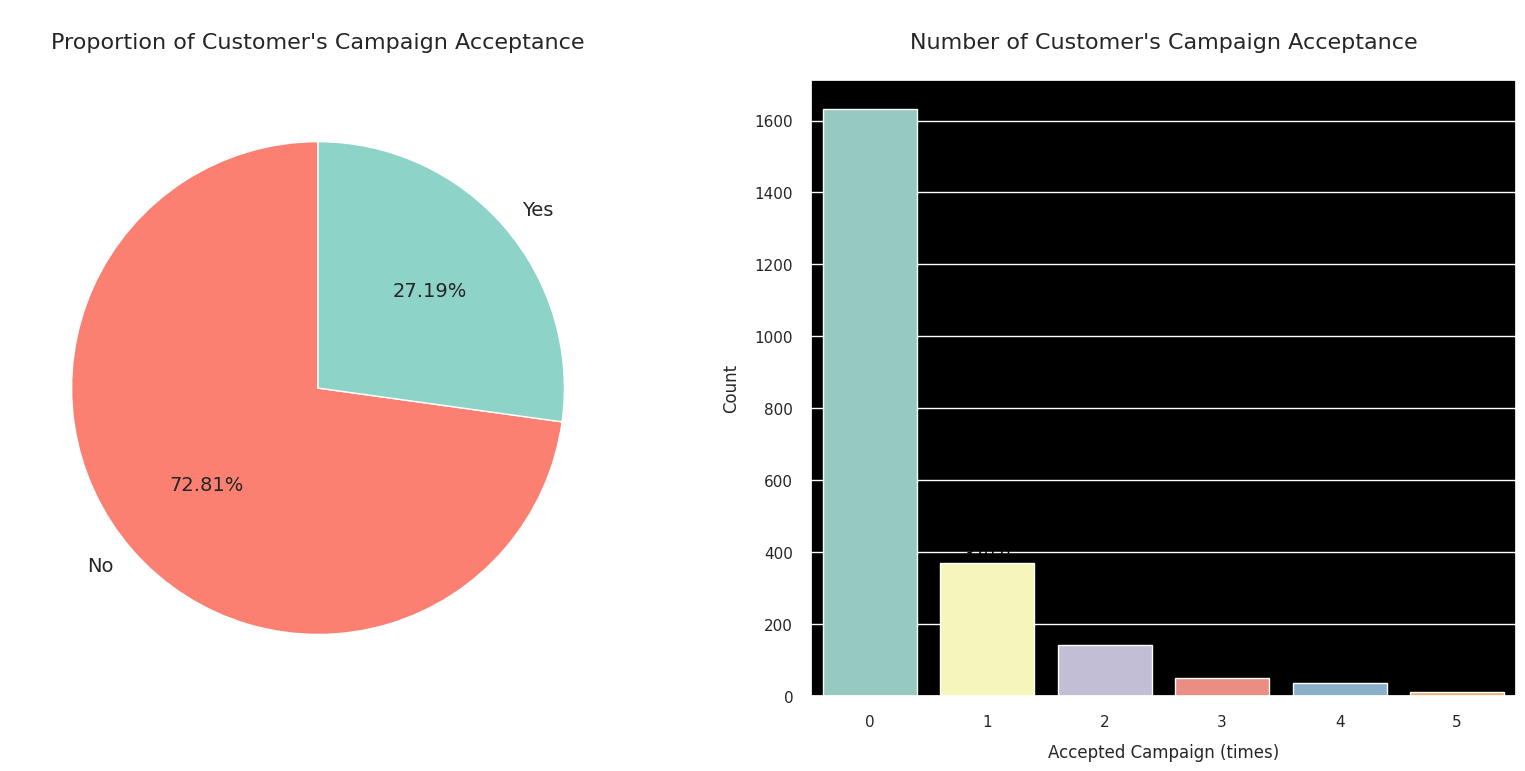

In [ ]:
myColor = ['#fb8072', '#8dd3c7']

plt.figure(figsize=(20,8),facecolor='white')

plt.subplot(1,2,1)
plt.pie(
    x=acc_cmp_1['%'],
    labels=acc_cmp_1['Acc_Cmp'],
    autopct=f'%.2f%%',
    startangle=90,
    textprops={'fontsize': 14},
    colors= myColor
)
plt.title('\nProportion of Customer\'s Campaign Acceptance\n',size=16)


plt.subplot(1,2,2)
ax = sns.countplot(data=df, x='Total_AccCmp', palette='Set3')
plt.title('\nNumber of Customer\'s Campaign Acceptance\n',size=16)
plt.xlabel('Accepted Campaign (times)',labelpad=10)
plt.ylabel('Count',labelpad=10)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+50), ha='center', va='top', color='black', size=12)

plt.tight_layout;

In [ ]:
df['Year_Customer'] = df['Dt_Customer'].dt.year



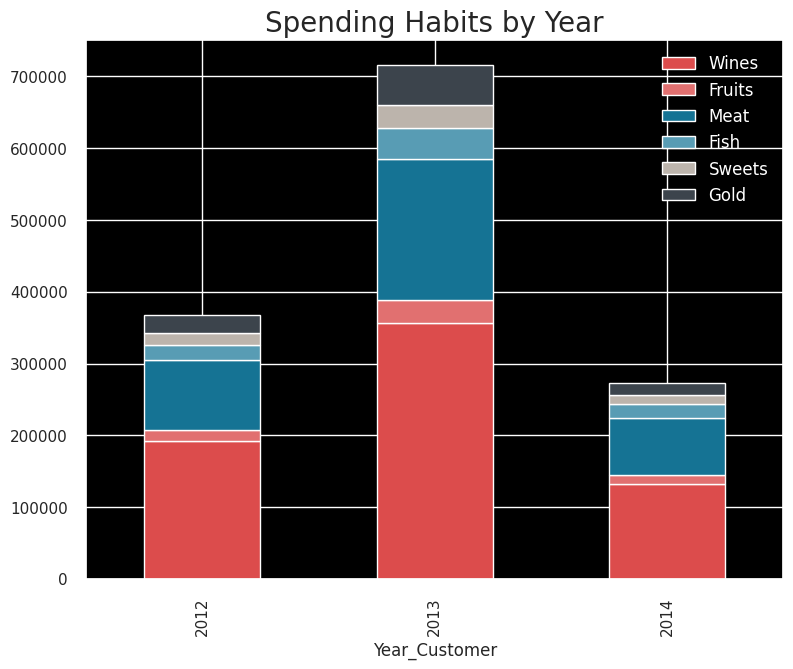

In [ ]:
yearly_spendings = df.groupby('Year_Customer')[['Wines', 'Fruits', 'Meat',
                                                'Fish', 'Sweets', 'Gold']].sum()

ax = yearly_spendings.plot(kind='bar', stacked=True, figsize=(9, 7),
                           color=['#dc4c4c', '#e17070', '#157394', '#589cb4', '#bcb4ac', '#3c444c'])

plt.title('Spending Habits by Year', fontsize=20)


# Access the legend object and set its text color to white
legend = ax.legend(fontsize=12)
for text in legend.get_texts():
    text.set_color('white')

ax.set_facecolor('black')

plt.show()


However in 2012, the data is gathered from 2012/08 and ,in 2014, data is gathered until 2014/07. Thus, that makes sense that 2013 have the greatest number of enrollment. The graph below shows the average number of enrollment over time.

##Dropping outliers

In [ ]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<160000 )]
print("The size of data after removing the outliers:", df.shape)


The size of data after removing the outliers: (2234, 34)


## Elimination of redundant features


---


Observations

- Next, we will eliminate some of the columns of variables that are contained in other variables or that do not contribute information. These columns include the  Teenhome, and Kidhome.

#Univariate analysis

Analysis by AGE

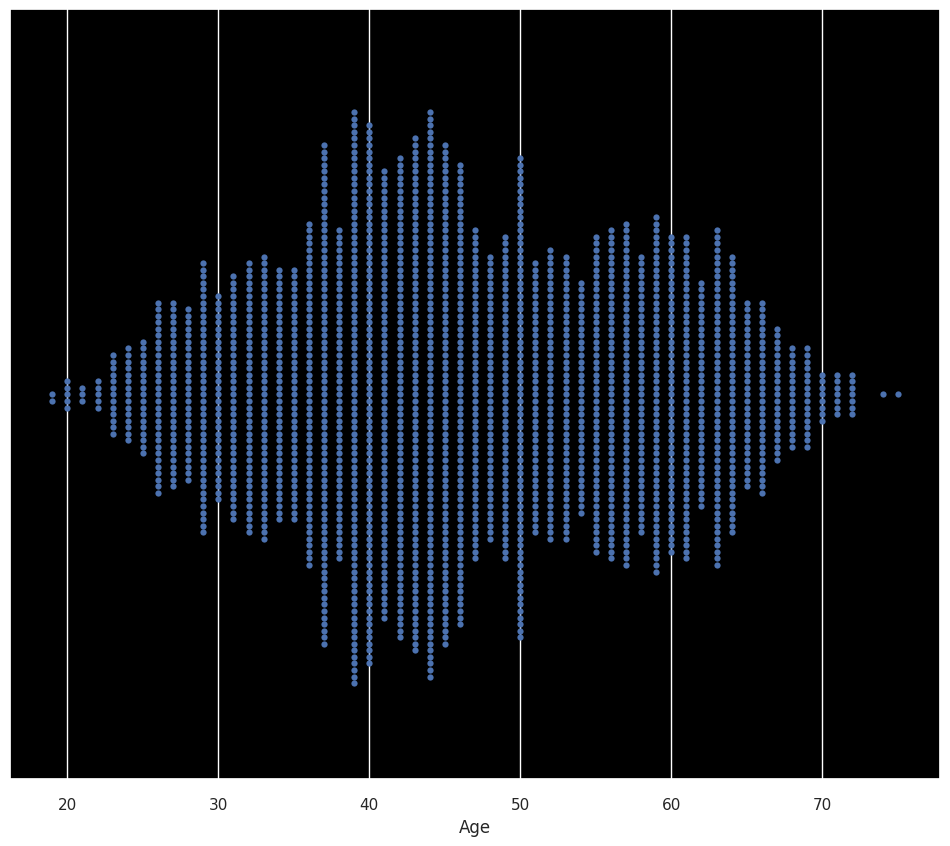

In [ ]:
plt.figure(figsize=(12, 10))  # Set the size of the plot

g = sns.swarmplot(data=df, x='Age', s=4.5, orient="h")

plt.show(g)

Correlation Analysis


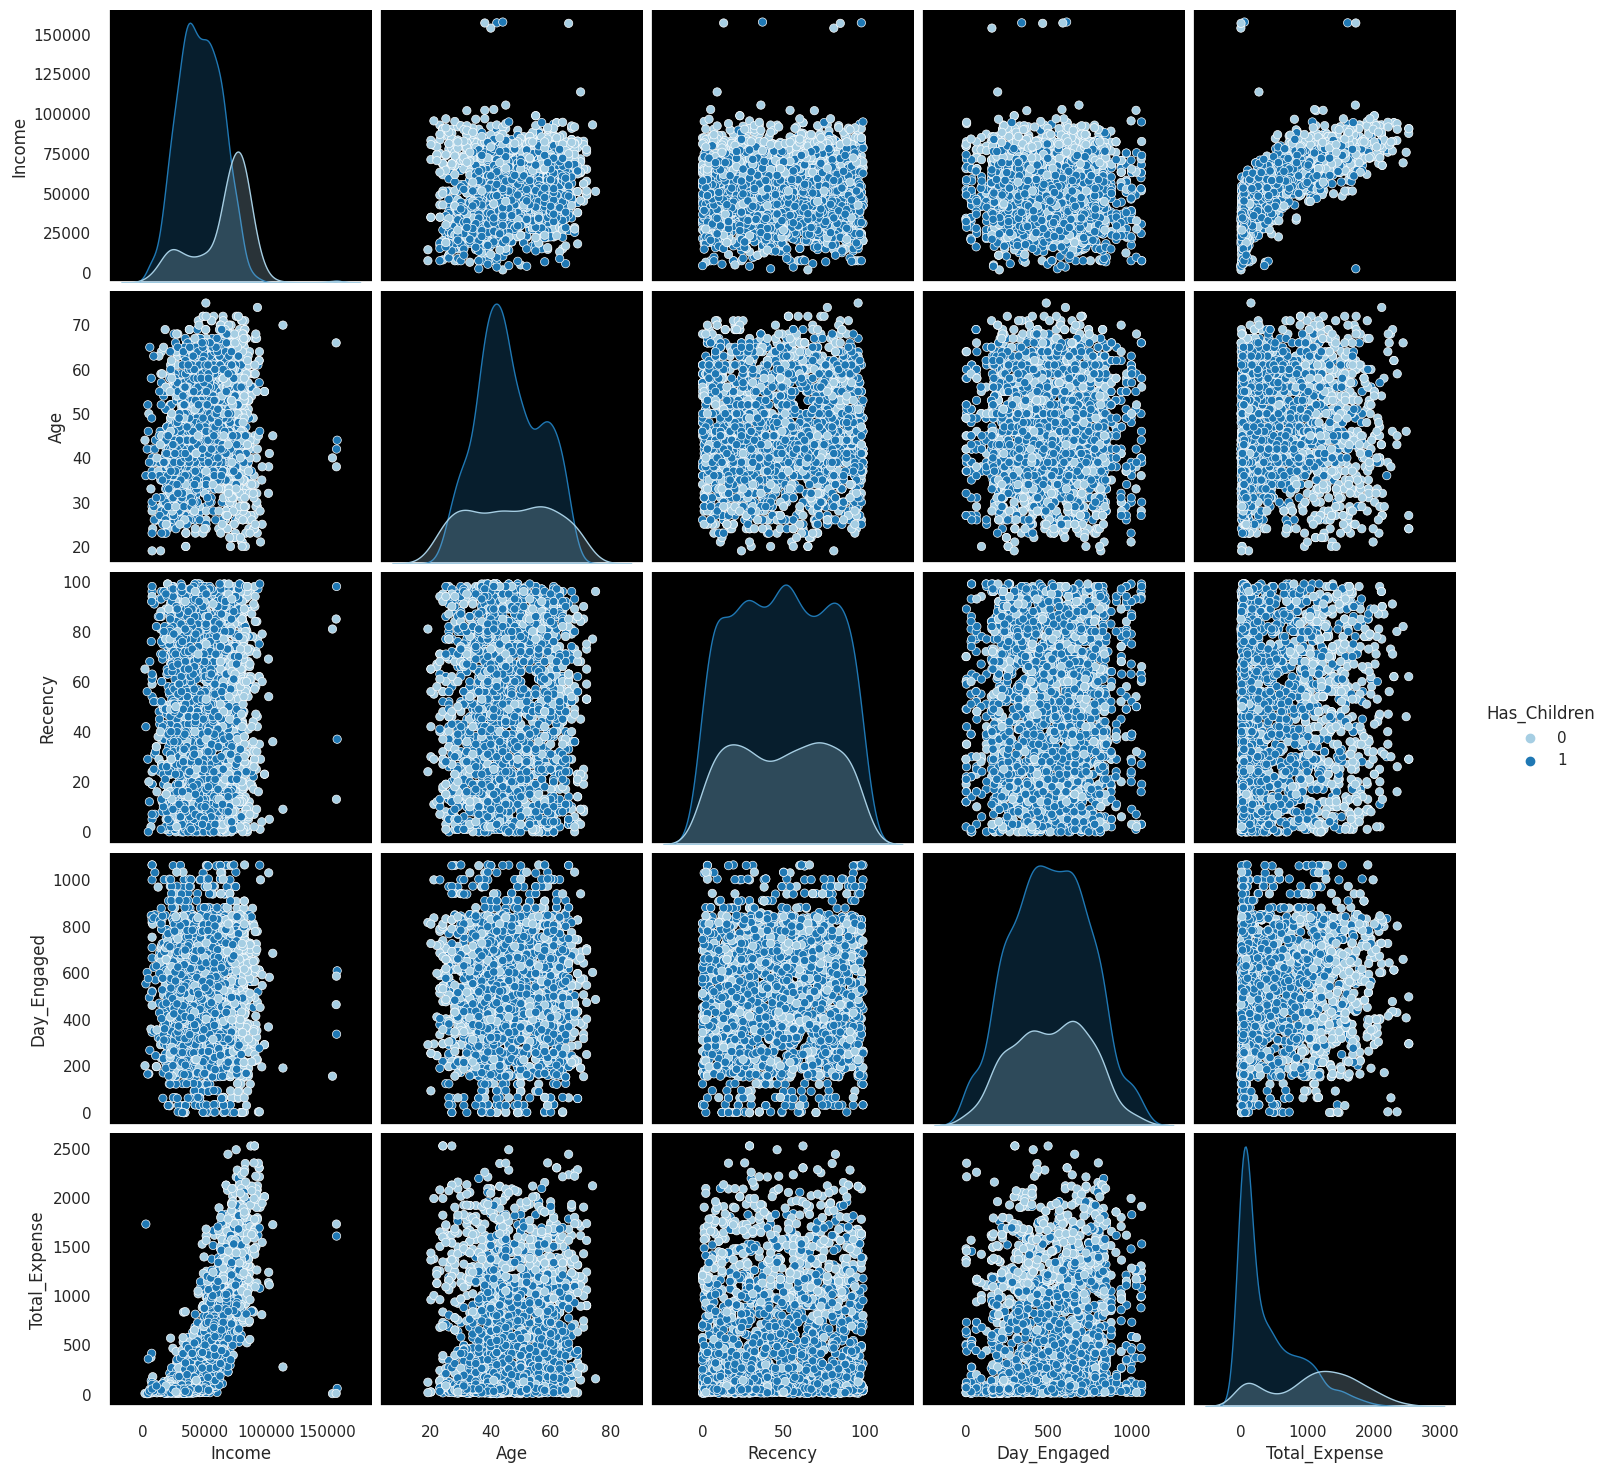

In [ ]:
To_Plot = ["Income", "Age", "Recency", "Has_Children", "Day_Engaged", "Total_Expense"]

# Set the style to a dark background without grid lines and white text
sns.set(style="dark", rc={"axes.facecolor": "black"})

# Create the pair plot
sns.pairplot(df[To_Plot], hue="Has_Children", palette="Paired", height=3)  # Adjust the height as needed

# Display the plot
plt.show()


Income: Income is positively correlated with Recency, Wines, Fruits, Meat, Fish, Sweets, Gold, NumDealsPurchases, NumStorePurchases, NumWebVisits Month, and Total Expenses. This means that people with higher incomes tend to spend more money on these items.
NumWebPurchases: NumWebPurchases is negatively correlated with Recency and TotalPurchases. This means that people who make more purchases online tend to have lower recency (meaning they have purchased more recently) and lower total purchases overall.
Children: Children is negatively correlated with Income and Total Expenses. This means that people with children tend to have lower incomes and spend less money overall. this first but will explore more in clustring

Potential redundancy: AcceptedCmp1, AcceptedCmp2, and AcceptedCmp3 have very similar correlation patterns with the other features

In [ ]:
columns_categorical = ['Children', 'Education', 'Marital_Status', 'Response']

In [ ]:

# Set the template font
pio.templates['plotly_dark']['layout']['font'] = {'family': 'verdana', 'size': 16, 'color': 'white'}

# plotly setup
plot_rows = 1
plot_cols = 4
fig = make_subplots(
    rows=plot_rows,
    cols=plot_cols,
    shared_yaxes=False,
    vertical_spacing=0.1,
    subplot_titles=('1', '2', '3', '4'),
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
)

# Add traces
x = 0
names = {}
count = 1
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig1 = px.pie(df, values='Income', names=columns_categorical[x])

        trace1 = fig1.data[0]
        fig.add_trace(trace1, row=i, col=j)
        names[str(count)] = columns_categorical[x]
        x = x + 1
        count = count + 1

# Update layout for larger size and white title
fig.update_layout(width=1200, height=600, title_font_color='white')

# Update annotations position
fig.update_annotations(y=0.8)

fig.show()


In [ ]:
#df1 = df.copy()
#umeric = df.select_dtypes(exclude='object')

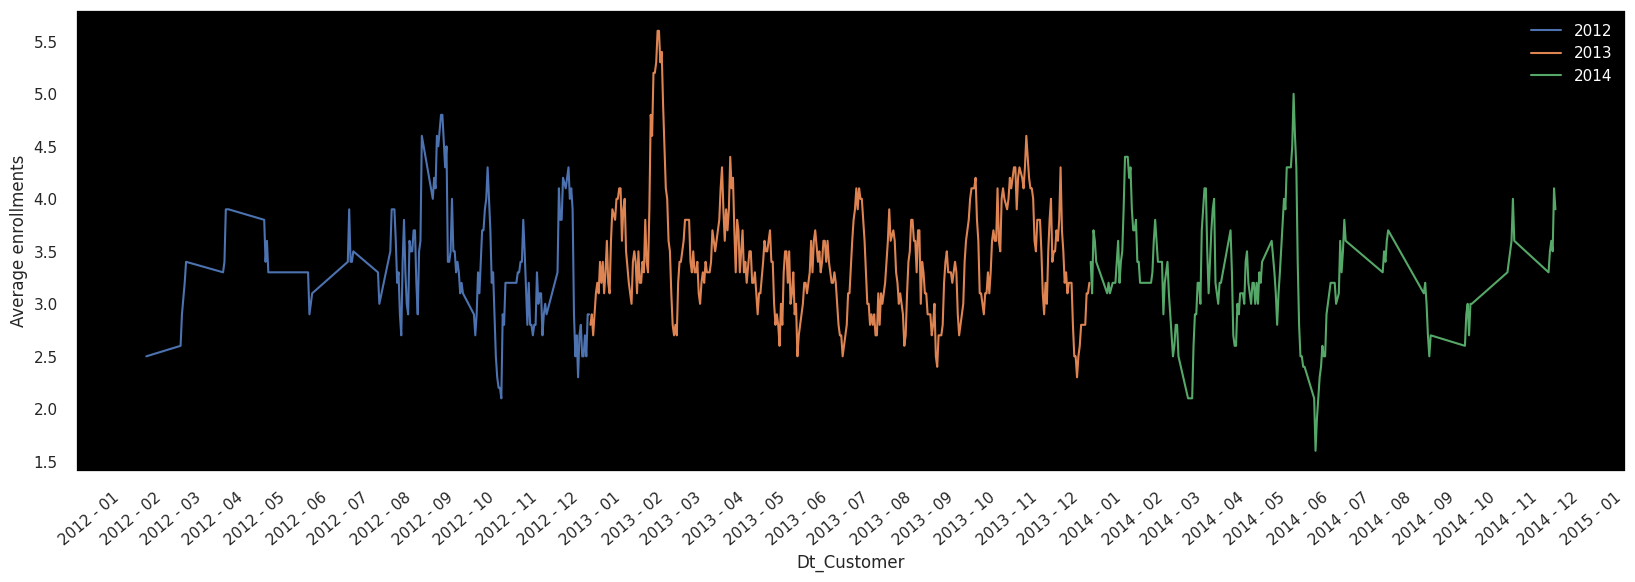

In [ ]:
import matplotlib.dates as mdates

df = pd.pivot_table(numeric, values='ID', index='Dt_Customer', aggfunc='count')
df['count'] = df['ID'].rolling(10).mean()
df['Year'] = df.index.year.astype('category')

fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
fig.set_facecolor('white')  # Set the background color to white

line = sns.lineplot(data=df, x='Dt_Customer', y='count', ax=ax, hue='Year')
line.legend(labelcolor='white')  # Change legend text color to white
ax.set_ylabel('Average enrollments')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y - %m'))
plt.xticks(rotation=40)
plt.show()


In [ ]:
df

ID  Year_Birth     Education Marital_Status   Income  Kidhome  \
0      5524        1957      Graduate          Alone  58138.0        0   
1      2174        1954      Graduate          Alone  46344.0        1   
2      4141        1965      Graduate       Relation  71613.0        0   
3      6182        1984      Graduate       Relation  26646.0        1   
4      5324        1981  Postgraduate       Relation  58293.0        1   
...     ...         ...           ...            ...      ...      ...   
2235  10870        1967      Graduate       Relation  61223.0        0   
2236   4001        1946  Postgraduate       Relation  64014.0        2   
2237   7270        1981      Graduate          Alone  56981.0        0   
2238   8235        1956  Postgraduate       Relation  69245.0        0   
2239   9405        1954  Postgraduate       Relation  52869.0        1   

      Teenhome Dt_Customer  Recency  Wines  ...  AcceptedCmp2  Complain  \
0            0  2012-04-09       58    635  ...             0         0   
1            1  2014-08-03       38     11  ...             0         0   
2            0  2013-08-21       26    426  ...             0         0   
3            0  2014-10-02       26     11  ...             0         0   
4            0  2014-01-19       94    173  ...             0         0   
...        ...         ...      ...    ...  ...           ...       ...   
2235         1  2013-06-13       46    709  ...             0         0   
2236         1  2014-10-06       56    406  ...             0         0   
2237         0  2014-01-25       91    908  ...             0         0   
2238         1  2014-01-24        8    428  ...             0         0   
2239         1  2012-10-15       40     84  ...             0         0   

      Response  Day_Engaged  Age  Children  Has_Children  Total_Expense  \
0            1          971   58         0             0           1617   
1            0          125   61         2             1             27   
2            0          472   50         0             0            776   
3            0           65   31         1             1             53   
4            0          321   34         1             1            422   
...        ...          ...  ...       ...           ...            ...   
2235         0          541   48         1             1           1341   
2236         0           61   69         3             1            444   
2237         0          315   34         0             0           1241   
2238         0          316   59         1             1            843   
2239         1          782   61         2             1            172   

      Total_AccCmp  Year_Customer  
0                1           2012  
1                0           2014  
2                0           2013  
3                0           2014  
4                0           2014  
...            ...            ...  
2235             0           2013  
2236             1           2014  
2237             1           2014  
2238             0           2014  
2239             1           2012  

[2234 rows x 34 columns]

## "NumWebPurchases" vs "NumStorePurchases"

"NumWebPurchases" vs "NumStorePurchases" to see if there is a relationship between the two types of purchases. The box plot shows the median, first and third quartiles, and outliers of the data

Education vs Salary

In [ ]:
# Create the box plot
fig18 = px.box(df, x="NumWebPurchases", y="NumStorePurchases")

# Update layout with black background and white text
fig18.update_layout(
    plot_bgcolor='black',  # Set the plot background color to black
    paper_bgcolor='black',  # Set the plot area background color to black
    font=dict(color='white')  # Set text color to white
)

fig18.show()


##scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth"
scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth" to see if there is a correlation between web purchases and visits. The scatter plot shows the relationship between two variables as individual data points. A positive correlation is indicated by the points moving from lower left to upper right, while a negative correlation is indicated by the points moving from upper left to lower right.

In [ ]:
# Create the scatter plot
fig19 = px.scatter(df, x="NumWebPurchases", y="NumWebVisitsMonth")

# Update layout with a customized background and no gridlines
fig19.update_layout(
   # plot_bgcolor='black',  # Set the plot background color to black
    #paper_bgcolor='black',  # Set the plot area background color to black
    #font=dict(color='white'),  # Set text color to white for better visibility

)

fig19.show()


##Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases

In [ ]:
fig25 = px.scatter(df, x="NumDealsPurchases", y="NumStorePurchases", trendline="ols")

# Update the layout to change background color and remove gridlines
fig25.update_layout({
    "plot_bgcolor": "black",  # Set the background color to black
    "xaxis": {"showgrid": False},  # Remove x-axis gridlines
    "yaxis": {"showgrid": False},  # Remove y-axis gridlines
})

fig25.show()


In [ ]:
RED_del = ['ID', 'Year_Birth', 'Year_Customer', 'Complain', 'Dt_Customer' ]
df = df.drop(RED_del, axis=1)

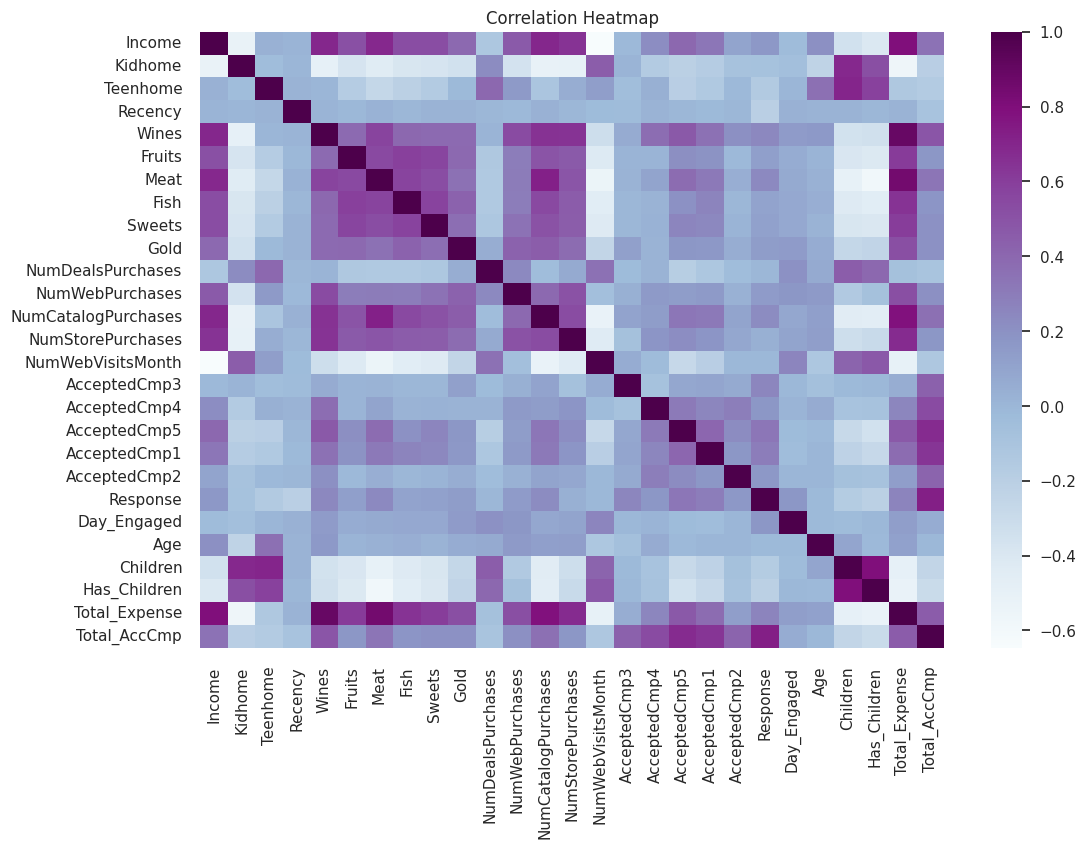

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(df.corr(numeric_only=True), cmap='BuPu' )
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

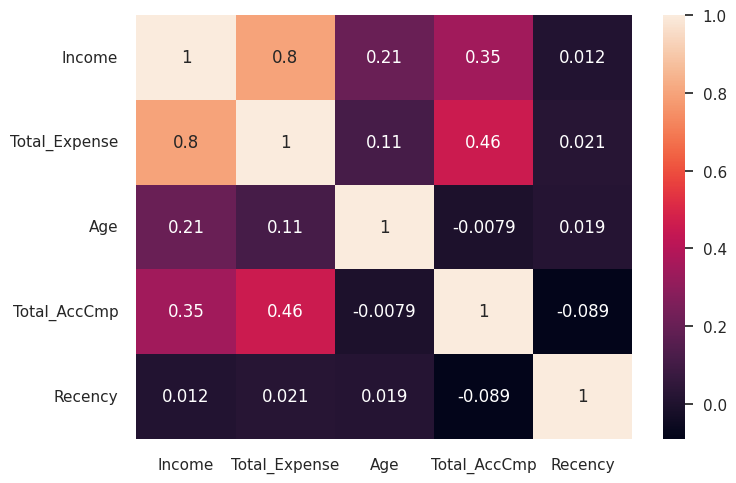

In [ ]:
sns.heatmap(df[['Income', 'Total_Expense','Age', 'Total_AccCmp', 'Recency']].corr(), annot=True)

Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']]).reshape(-1,19)

#DATA PREPROCESSING



In [ ]:
#Creating a copy of data
df_km = df.copy()

In [ ]:
df_km

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  Wines  \
0             0               0  58138.0        0         0       58    635   
1             0               0  46344.0        1         1       38     11   
2             0               1  71613.0        0         0       26    426   
3             0               1  26646.0        1         0       26     11   
4             1               1  58293.0        1         0       94    173   
...         ...             ...      ...      ...       ...      ...    ...   
2235          0               1  61223.0        0         1       46    709   
2236          1               1  64014.0        2         1       56    406   
2237          0               0  56981.0        0         0       91    908   
2238          1               1  69245.0        0         1        8    428   
2239          1               1  52869.0        1         1       40     84   

      Fruits  Meat  Fish  ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0         88   546   172  ...             0             0             0   
1          1     6     2  ...             0             0             0   
2         49   127   111  ...             0             0             0   
3          4    20    10  ...             0             0             0   
4         43   118    46  ...             0             0             0   
...      ...   ...   ...  ...           ...           ...           ...   
2235      43   182    42  ...             0             0             0   
2236       0    30     0  ...             0             1             0   
2237      48   217    32  ...             0             0             0   
2238      30   214    80  ...             0             0             0   
2239       3    61     2  ...             0             0             0   

      Response  Day_Engaged  Age  Children  Has_Children  Total_Expense  \
0            1          971   58         0             0           1617   
1            0          125   61         2             1             27   
2            0          472   50         0             0            776   
3            0           65   31         1             1             53   
4            0          321   34         1             1            422   
...        ...          ...  ...       ...           ...            ...   
2235         0          541   48         1             1           1341   
2236         0           61   69         3             1            444   
2237         0          315   34         0             0           1241   
2238         0          316   59         1             1            843   
2239         1          782   61         2             1            172   

      Total_AccCmp  
0                1  
1                0  
2                0  
3                0  
4                0  
...            ...  
2235             0  
2236             1  
2237             1  
2238             0  
2239             1  

[2234 rows x 29 columns]

In [ ]:
#Get list of categorical variables
s = (df_km.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
lenc.fit(df_km['Marital_Status'])
df_km['Marital_Status'] = lenc.transform(df_km['Marital_Status'])
from sklearn.preprocessing import OrdinalEncoder
edu = ['Undergraduate' , 'Graduate' , 'Postgraduate']
ore = OrdinalEncoder(categories=([edu]))
ore.fit(df_km[['Education']])
df_km['Education'] = ore.transform(df_km[['Education']])
print("All features are now numerical")

ValueError: invalid literal for int() with base 10: 'Undergraduate'

# Standardization

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Day_Engaged', 'Age', 'Children', 'Has_Children',
       'Total_Expense', 'Total_AccCmp'],
      dtype='object')

In [ ]:
# creating a subset of dataframe by dropping the features on deals accepted and promotions
#cols_del = []
#df_km = df_km.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(df_km)
scaled_ds = pd.DataFrame(scaler.transform(df_km),columns= df_km.columns )
print("All features are now scaled")

ValueError: could not convert string to float: 'Graduate'

In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(df_km)
scaled_ds = pd.DataFrame(scaler.transform(df_km),columns= df_km.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0  -0.410934       -1.346700  0.296909 -0.824799 -0.930561  0.306095   
1  -0.410934       -1.346700 -0.260378  1.032662  0.905900 -0.384629   
2  -0.410934        0.742556  0.933626 -0.824799 -0.930561 -0.799064   
3  -0.410934        0.742556 -1.191143  1.032662 -0.930561 -0.799064   
4   1.124228        0.742556  0.304233  1.032662 -0.930561  1.549399   

      Wines    Fruits      Meat      Fish  ...  NumStorePurchases  \
0  0.982380  1.553239  1.697617  2.459819  ...          -0.554042   
1 -0.871487 -0.636614 -0.717326 -0.650664  ...          -1.169676   
2  0.361453  0.571580 -0.176200  1.343704  ...           1.292858   
3 -0.871487 -0.561102 -0.654717 -0.504288  ...          -0.554042   
4 -0.390194  0.420556 -0.216449  0.154402  ...           0.061591   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0     -0.280546     -0.284242     -0.279616     -0.262487     -0.116669   
1     -0.280546     -0.284242     -0.279616     -0.262487     -0.116669   
2     -0.280546     -0.284242     -0.279616     -0.262487     -0.116669   
3     -0.280546     -0.284242     -0.279616     -0.262487     -0.116669   
4     -0.280546     -0.284242     -0.279616     -0.262487     -0.116669   

   Response       Age  Children  Total_Expense  
0  2.385083  1.016010 -1.264686       1.681421  
1 -0.419273  1.272384  1.395680      -0.962199  
2 -0.419273  0.332345 -1.264686       0.283129  
3 -0.419273 -1.291357  0.065497      -0.918970  
4 -0.419273 -1.034983  0.065497      -0.305451  

[5 rows x 25 columns]

Now, time for encoding. There are 2 features that needs to be encoded. Education and marital status. I’m using label encoding on marital status and ordinal encoding for education.

# PCA
In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

Steps in this section:

Dimensionality reduction with PCA
Plotting the reduced dataframe
Dimensionality reduction with PCA

For this project, I will be reducing the dimensions to 3.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'scaled_ds' is your scaled dataset
# Initiating PCA to reduce dimensions
pca = PCA()
pca.fit(scaled_ds)



PCA()

In [ ]:
pca.explained_variance_ratio_

array([3.05305466e-01, 9.45738910e-02, 7.51802966e-02, 5.55098844e-02,
       4.74541777e-02, 4.05406345e-02, 4.02919800e-02, 3.93827731e-02,
       3.67774096e-02, 3.07115010e-02, 2.64298876e-02, 2.50982261e-02,
       2.40808023e-02, 2.33987647e-02, 2.17879412e-02, 1.99075497e-02,
       1.76201063e-02, 1.71191698e-02, 1.52204928e-02, 1.45500668e-02,
       1.07998203e-02, 1.02138269e-02, 8.04533138e-03, 1.17677952e-32,
       8.15016877e-33])

Education (0.3013379)
Marital_Status (0.08986258)
Income (0.08376509)
Recency (0.05071958)
Wines (0.03945757)

In [ ]:
#Initiating PCA to reduce dimentions aka features to 10
from sklearn.decomposition import PCA

# Initiating PCA to reduce dimensions to 10
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pca.transform(scaled_ds)



In [ ]:
PCA_ds = pd.DataFrame(PCA_ds[:, 0:3], columns=['PC1', 'PC2', 'PC3'  ])

PCA_ds.head(1)


PC1       PC2     PC3
0  4.585419 -0.635386 -0.8931

# k-means

## Elbow graph to determine optimal value of n_clusters

Elbow value= 5


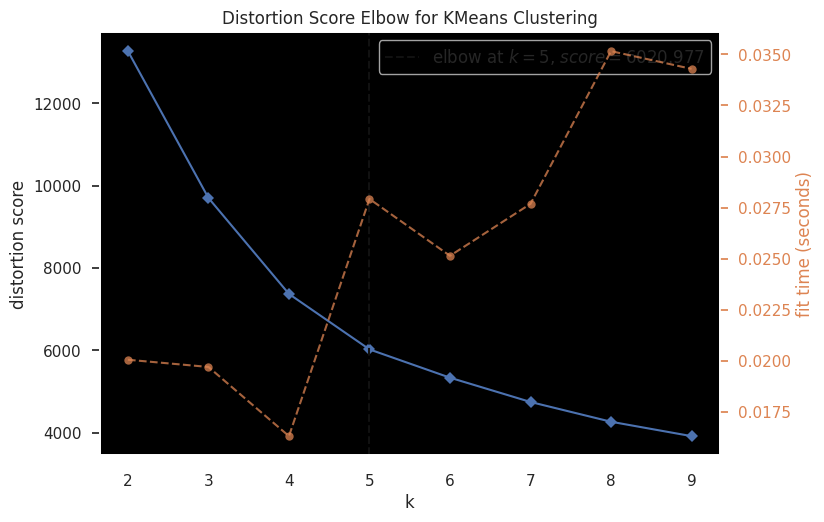

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Assuming PCA_ds is your transformed data
model = KMeans(random_state=42, n_init=5, max_iter=100000)

# Initialize the visualizer
visualizer = KElbowVisualizer(model, k= 9)
visualizer.fit(PCA_ds)  # Fit the data to the visualizer
print(f'Elbow value= {visualizer.elbow_value_}')
visualizer.show()


As it is not very clear from the elbow method that which value of K to choose.



# Silhouette Score

In [ ]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,11)
for i in K:
    km = KMeans(n_clusters = i, n_init=10, random_state=42, max_iter=1000)
    y = km.fit_predict(PCA_ds)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(PCA_ds,y))

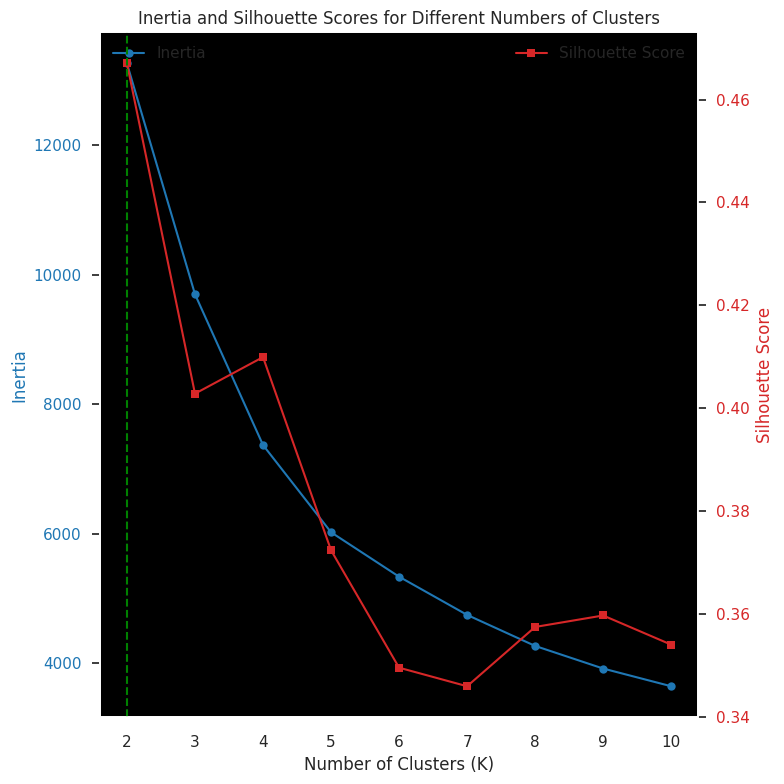

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 8))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(K, Sum_of_squared_distances, color=color, marker='o', label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K, silhouette_scores, color=color, marker='s', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

best_silhouette_score = max(silhouette_scores)  # Finding the maximum silhouette score
best_k_silhouette = K[silhouette_scores.index(best_silhouette_score)]  # Finding the corresponding K for the best silhouette score

plt.axvline(x=best_k_silhouette, color='green', linestyle='--', label=f'Best Silhouette Score (K={best_k_silhouette})')

plt.title('Inertia and Silhouette Scores for Different Numbers of Clusters')
plt.tight_layout()
plt.show()


In [ ]:
range_n_clusters = [2,3,4,5]

figures = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2,
                        print_grid=False,
                        subplot_titles=('The silhouette plot for the various clusters.',
                                              'The visualization of the clustered data.'))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    fig['layout']['xaxis1'].update(title='The silhouette coefficient values',
                                   range=[-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    fig['layout']['yaxis1'].update(title='Cluster label',
                                   showticklabels=False,
                                   range=[0, len(PCA_ds) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, max_iter=1000)
    cluster_labels = clusterer.fit_predict(PCA_ds)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCA_ds, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(PCA_ds, cluster_labels)
    y_lower = 10

    color = []

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i


        colors = mpl.colors.colorConverter.to_rgb(cm.nipy_spectral(float(i) / n_clusters))
        colors = 'rgb'+str(colors)
        color.append(colors)
        filled_area = go.Scatter(y=np.arange(y_lower, y_upper),
                                 x=ith_cluster_silhouette_values,
                                 mode='lines',
                                 showlegend=False,
                                 line=dict(width=0.5,
                                          color=colors),
                                 fill='tozerox',
                                 name='Silhouette')
        fig.add_traces(filled_area, 1, 1)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


        # The vertical line for average silhouette score of all the values
        axis_line = go.Scatter(x=[silhouette_avg, silhouette_avg],
                               y=[0, y_upper],
                               showlegend=False,
                               mode='lines',
                               line=dict(color="red", dash='dash',
                                         width =2) )


        fig.append_trace(axis_line, 1, 1)


#   2nd Plot showing the actual clusters formed
    clusters = go.Scatter(x=PCA_ds['PC1'],
                          y=PCA_ds['PC2'],
                          showlegend=False,
                          mode='markers',
                          marker=dict(color=cluster_labels,
                                     size=4, colorscale=color),
                          name='Data'
                         )
    fig.append_trace(clusters, 1, 2)

    # Labeling the clusters
    centers_ = clusterer.cluster_centers_
#     Draw white circles at cluster centers

    df_k_means_center = pd.DataFrame(
        {
            'x1':centers_[:,0],
            'x2':centers_[:,1]

        }
    )

    centers = go.Scatter(x=df_k_means_center.x1,
                         y=df_k_means_center.x2,
                         showlegend=True,
                         text=list(range(1, n_clusters + 1)),
                         mode='markers',
                         name='k_means_centers',
                         marker=dict(color=color, size=20,
                                     symbol="x-dot",
                                     line=dict(width=2,
                                               color='rgb(175, 100, 88)'))
                        )

    fig.append_trace(centers, 1, 2)

    fig['layout']['xaxis2'].update(title='Feature space for the 1st feature',
                                   zeroline=False)
    fig['layout']['yaxis2'].update(title='Feature space for the 2nd feature',
                                  zeroline=False)


    fig['layout'].update(title="Silhouette analysis for KMeans clustering on sample data "
                         "with n_clusters = %d" % n_clusters)

    fig.update_layout(showlegend=True)
#     figures.append(fig)
    fig.show()

For n_clusters = 2 The average silhouette_score is : 0.46702082149196134


For n_clusters = 3 The average silhouette_score is : 0.40280107085972683


For n_clusters = 4 The average silhouette_score is : 0.40991156366237447


For n_clusters = 5 The average silhouette_score is : 0.37234611793335753


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ag = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ag.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2234.0  4.452819e-17  2.748856 -5.319869 -2.456098 -0.859099  2.199358   
col2  2234.0  2.226410e-17  1.417532 -3.682427 -0.952506 -0.206275  0.749544   
col3  2234.0  5.406995e-17  1.359486 -5.007414 -0.827468  0.014651  0.651880   

           max  
col1  8.495385  
col2  6.466102  
col3  7.902781

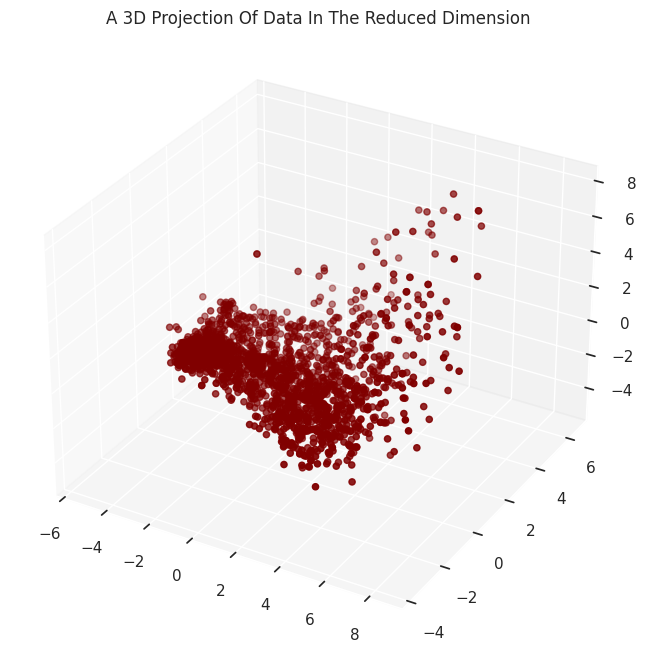

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming x, y, z are defined properly
x = PCA_ag["col1"]
y = PCA_ag["col2"]
z = PCA_ag["col3"]


# To plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot
ax.scatter(x, y, z, c="maroon", marker="o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

# Set background color
ax.set_facecolor('white')  # Change the background color to white

plt.show()


The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters

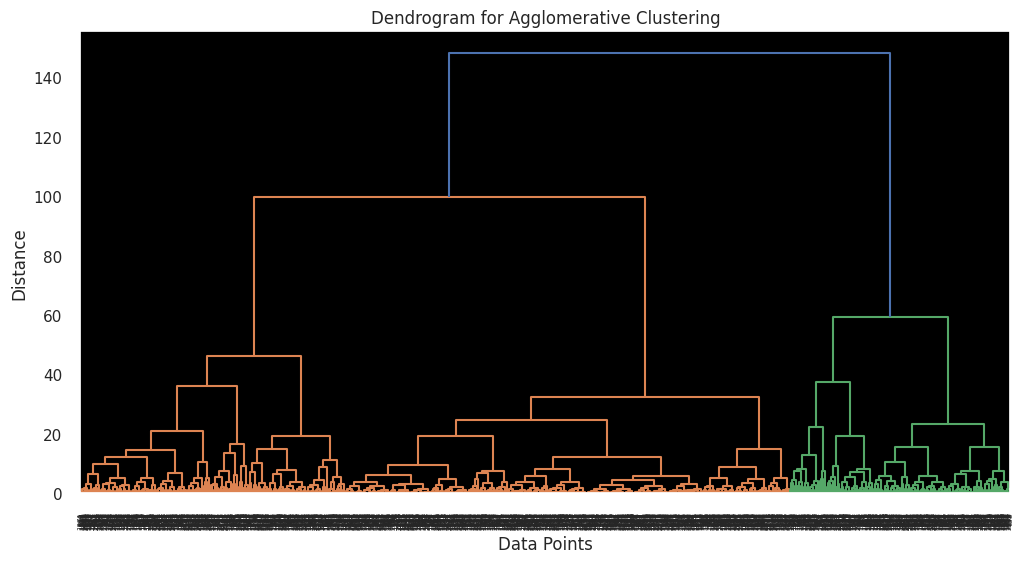

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming your data is stored in 'X' variable

# Perform hierarchical clustering
linked = linkage(PCA_ag, 'ward')  # You can use different linkage methods

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


#CLUSTERING

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


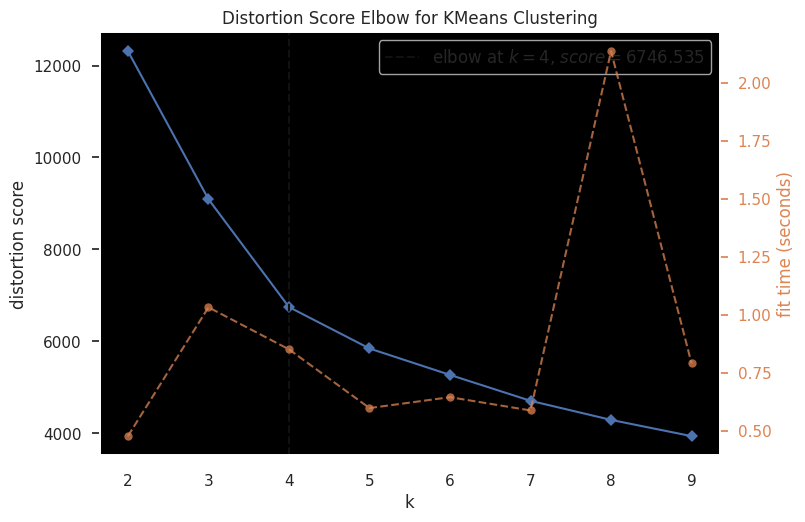

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Initialize the visualizer
print('Elbow Method to determine the number of clusters to be formed:')
model = KMeans(random_state=42, n_init=10, max_iter=10000)
Elbow_M = KElbowVisualizer(model, k=9)
Elbow_M.fit(PCA_ag)# Fit the data to the visualizer
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ag)
PCA_ag["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(PCA_ag, yhat_AC)
print(f"The silhouette score for the clusters is: {silhouette_avg}")

The silhouette score for the clusters is: 0.4909075693296077


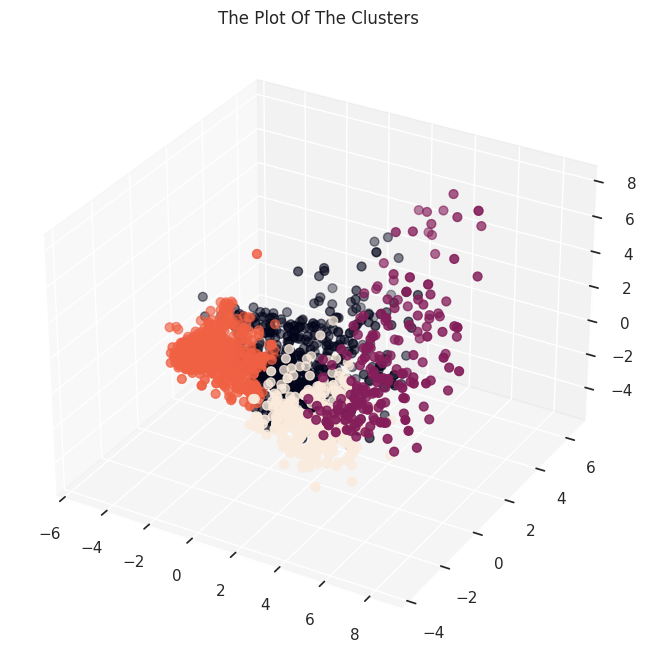

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ag["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
# Set the plot background color to white
plt.gca().set_facecolor('white')
plt.show()

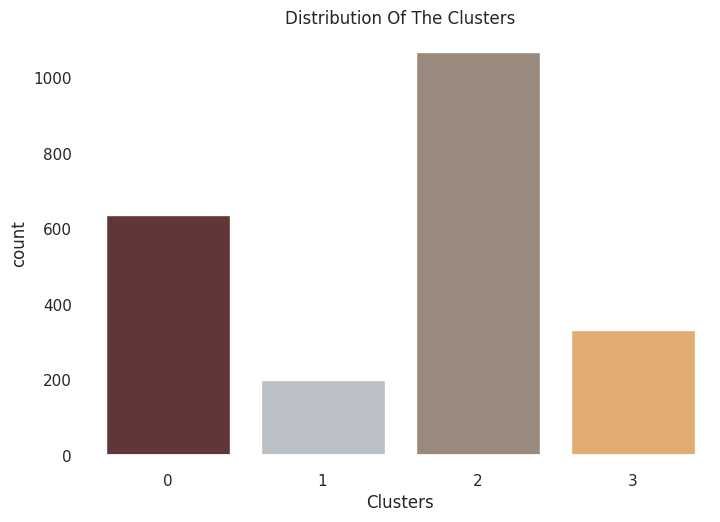

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
# Set the plot background color to white
plt.gca().set_facecolor('white')
plt.show()

In [ ]:
pl = sns.scatterplot(data = df,x=df[""], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

KeyError: 'spent'

EVALUATING MODELS

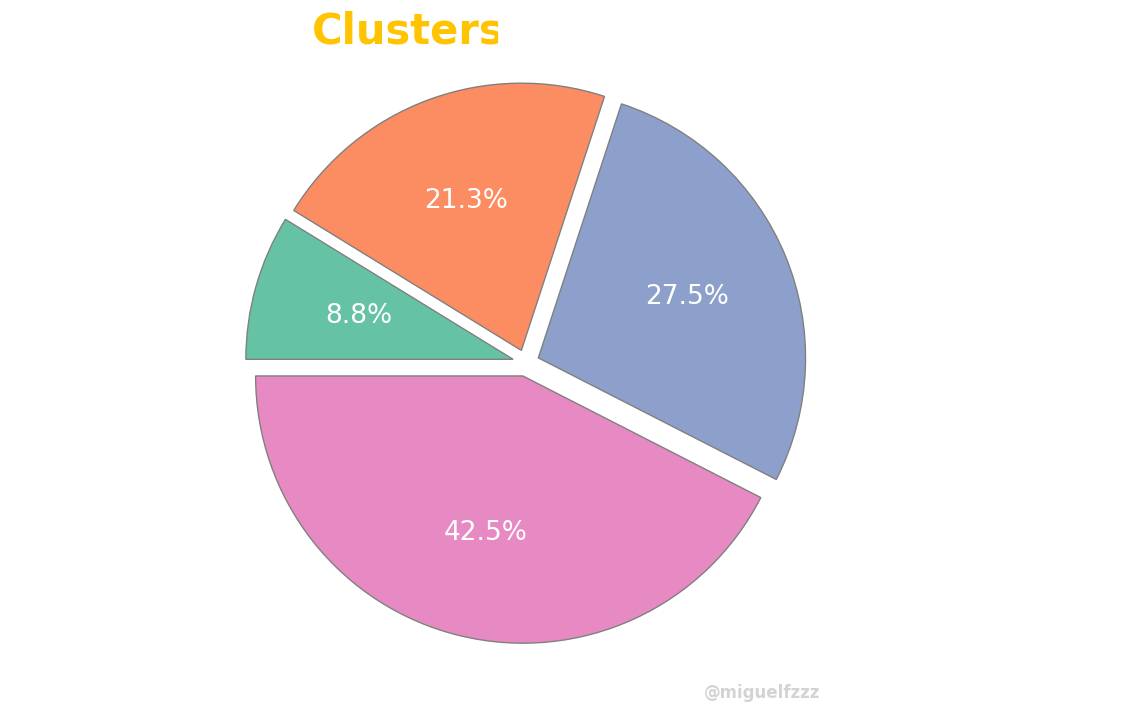

In [ ]:
# Results
clusters_count = df['Clusters'].value_counts()                        # Counting wins-losses-draws
clusters_count = clusters_count.to_frame().reset_index()                      # Convert series to dataframe
clusters_count.columns = ['Clusters', 'count']                                # Rename column names
clusters_count = clusters_count.sort_values('Clusters', ascending = True)     # Sorting data

labels = [
        "Good Customers",
        "Elite Customers",
        "Economical Customers",
        "Cheap Customers"
        ]

# Visualization
plt.figure(figsize=(12,8))

mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:4]

plt.pie(clusters_count['count'],
        explode=(0.05, 0.05, 0.05, 0.05),
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth': 1}
        )

plt.axis('equal')

# Title
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-0.12, 1.2, "Distribution", size=30, color="white")

# Author
plt.text(1.1, -1.25, "@miguelfzzz", fontsize=12, ha="right", color='lightgray', fontweight="bold")

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning:

29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categor

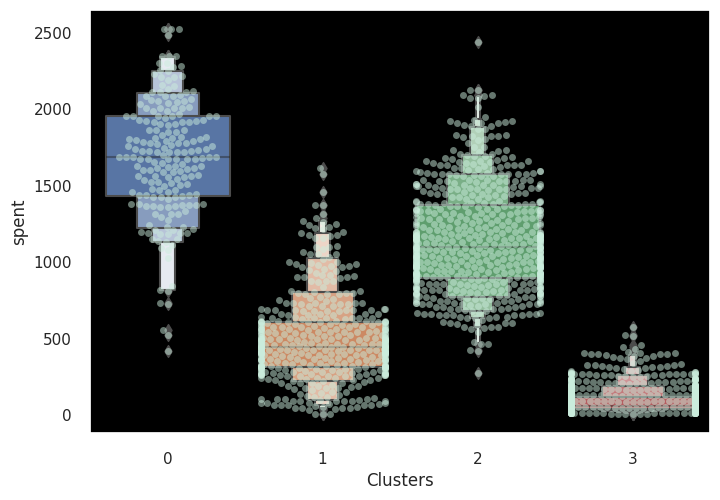

In [ ]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["spent"])
plt.show()

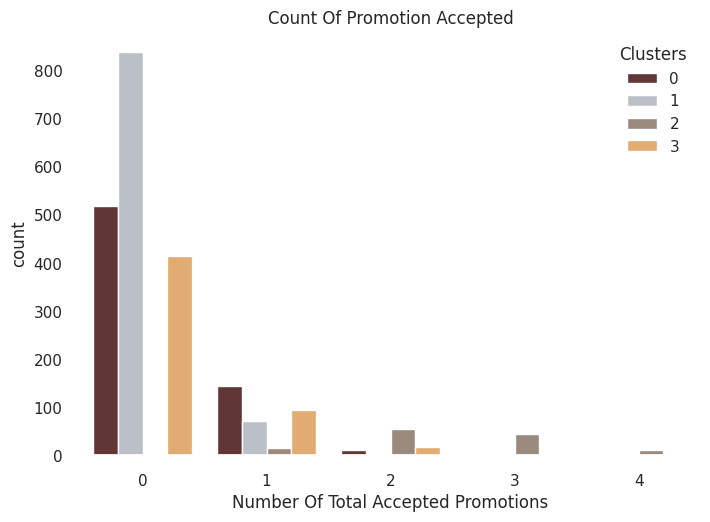

In [ ]:
#Creating a feature to get a sum of accepted promotions
df["Total_Promos"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"], hue=df["Clusters"], palette=pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")

# Set the background color to white
pl.set_facecolor('white')

plt.show()


In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df_km["Clusters"]= yhat_AC

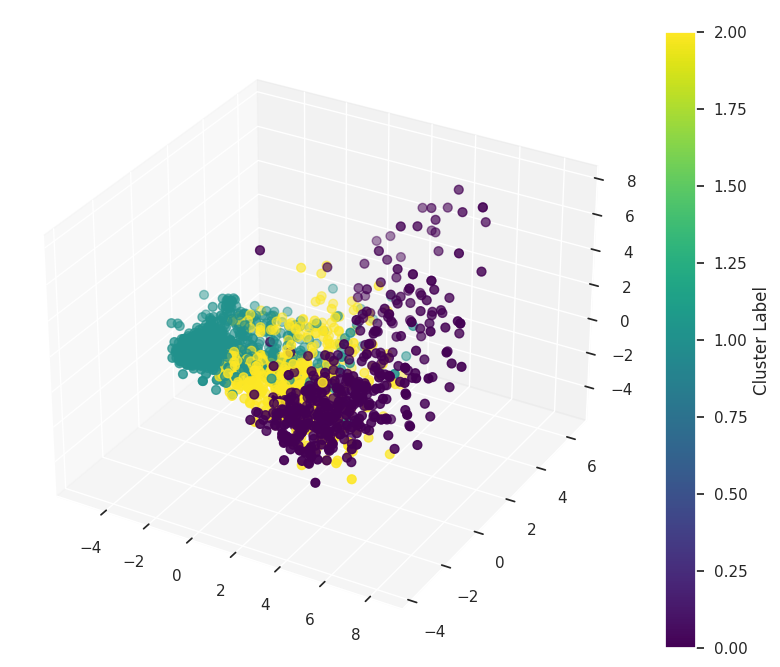

In [ ]:
# Assuming PCA_ds is your transformed data with "Clusters" column added
# Replace x, y, z with the respective columns from your PCA dataset
# For example, if your PCA dataset columns are 'PC1', 'PC2', 'PC3':
x = PCA_ds['PC1']
y = PCA_ds['PC2']
z = PCA_ds['PC3']

# Plotting the clusters in 3D with a white background
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, s=40, c=PCA_ds['Clusters'], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")

# Set the background color to white
ax.set_facecolor('white')

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.show()


In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
km = KMeans(n_clusters=4, n_init=10, random_state=42, max_iter=10000)
y = km.fit_predict(PCA_ds)
print(f"The average silhouette_score of KMeans is : {silhouette_score(PCA_ds, y)}\n")
df_km['Clusters'] = y

The average silhouette_score of KMeans is : 0.4021244508920622



ValueError: ignored

Evaluation of results

In [ ]:
columns_Numeric = [
               'Income', 'Recency', 'Wines', 'Fruits',
               'Meat', 'Fish', 'Sweets',
               'Gold', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Clusters']

In [ ]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_km:
    g = sns.FacetGrid(df_km, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k")
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

In [ ]:
fig = px.scatter_3d(df_campaign_imputeknn, x='Income', y='MntWines', z='NumStorePurchases',
                    color='k_means_pca', color_continuous_scale=px.colors.diverging.RdBu[::-1])

fig.update_traces(marker_size=6)
fig.update_coloraxes(showscale=False)
fig.update_layout(title=f"Evaluation of cluster in graphs 3D")

fig.show()

In [ ]:
# Grouping by 'Cluster' and aggregating the count of 'Recency'
df_km1 = df_km.groupby('Cluster').agg({'Recency': 'count'}).reset_index()

# Renaming the aggregated column to 'total_customers'
df_km1 = df_km1.rename(columns={'Recency': 'total_customers'})

# Calculating the total count of customers in the entire dataset
total_customers = df_km1['total_customers'].sum()

# Creating a new column 'total' with the total count of customers
df_km1['total'] = total_customers

# Calculating the percentage of customers in each cluster compared to the total number of customers
df_km1['percentage'] = round((df_km1['total_customers'] / total_customers) * 100, 2)


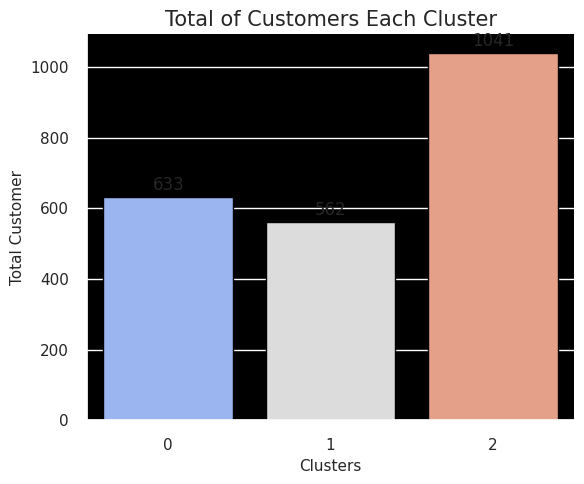

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15 )
sns.barplot(x='Cluster', y='total_customers', data=df_km1, edgecolor='black', palette='coolwarm')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)


sns.despine()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='clusters', y='total_customers', data=df_km, edgecolor='black', palette='coolwarm')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['27.65%', '28.54%', '21.46%', '22.35%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

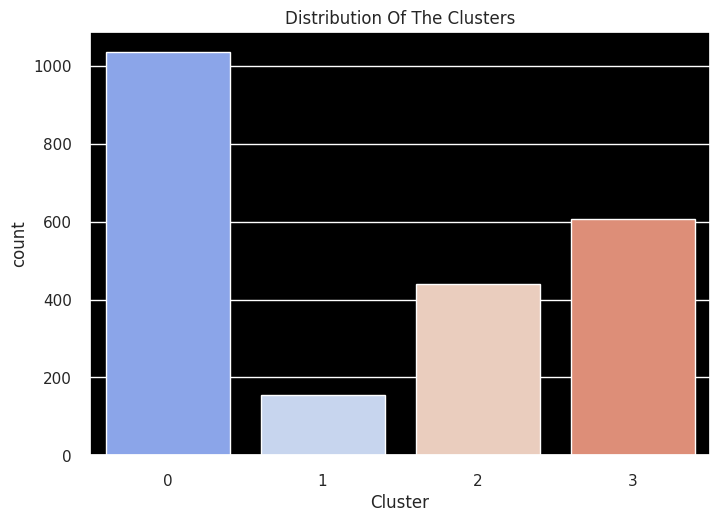

In [ ]:
#Plotting countplot of clusters

pl = sns.countplot(x=df_km["Cluster"], palette= 'coolwarm' )
pl.set_title("Distribution Of The Clusters")
plt.show()

# Creating &  Analysing RFM Segment

**Segment Description**



Champions-------------------------->Bought recently, buy often and spend the most

Loyal Customers-------------------->Buy on a regular basis. Responsive to promotions.

Potential Loyalist------------------->Recent customers with average frequency.

Recent Customers------------------->Bought most recently, but not often.

Promising---------------------------->Recent shoppers, but haven’t spent much.
Customers Needing Attention------>Above average recency, frequency and monetary values. May not have bought very recently though.

About To Sleep---------------------->Below average recency and frequency. Will lose them if not reactivated.

At Risk------------------------------->Purchased often but a long time ago. Need to bring them back!

Can’t Lose Them-------------------->Used to purchase frequently but haven’t returned for a long time.

Hibernating------------------------->Last purchase was long back and low number of orders. May be lost.  





In [ ]:

seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

RFM['segment'] = RFM['RFM_SCORE'].replace(seg_map, regex = True)

RFM.head()

index    ID  Recency  Frequency  Monatery recency_score frequency_score  \
0      0  5524       58         22      1617             3               5   
1      1  2174       38          4        27             4               1   
2      2  4141       26         20       776             4               4   
3      3  6182       26          6        53             4               2   
4      4  5324       94         14       422             1               3   

  monetary_score RFM_SCORE              segment  
0              5        35      loyal_customers  
1              1        41            promising  
2              4        44      loyal_customers  
3              1        42  potential_loyalists  
4              3        13              at_Risk

In [ ]:
RFM[["segment", "Recency", "Frequency", "Monatery"]].groupby("segment").agg(["mean", "count"])

Recency        Frequency           Monatery      
                          mean count       mean count         mean count
segment                                                                 
about_to_sleep       49.302083   192   5.260417   192    79.953125   192
at_Risk              78.425000   360  15.291667   360   886.063889   360
cant_loose           79.853503   157  23.350318   157  1305.808917   157
champions             9.369048   168  20.440476   168  1124.154762   168
hibernating          80.273224   366   5.401639   366    82.336066   366
loyal_customers      39.774566   346  20.453757   346  1170.661850   346
need_attention       50.101266    79  12.594937    79   581.329114    79
new_customers         9.531532   111   4.027027   111    44.558559   111
potential_loyalists  18.895954   346  10.115607   346   394.326590   346
promising            29.891892   111   3.990991   111    38.648649   111

In [ ]:
RFM[RFM["segment"] == "cant_loose"].head()


index    ID  Recency  Frequency  Monatery recency_score frequency_score  \
18      18  6565       91         24      1782             1               5   
29      29  1966       96         25      1672             1               5   
113    113   999       95         24       730             1               5   
124    124  7215       69         27      1135             2               5   
142    142  8690       73         22      1385             2               5   

    monetary_score RFM_SCORE     segment  
18               5        15  cant_loose  
29               5        15  cant_loose  
113              4        15  cant_loose  
124              4        25  cant_loose  
142              5        25  cant_loose

In [ ]:
!pip install squarify

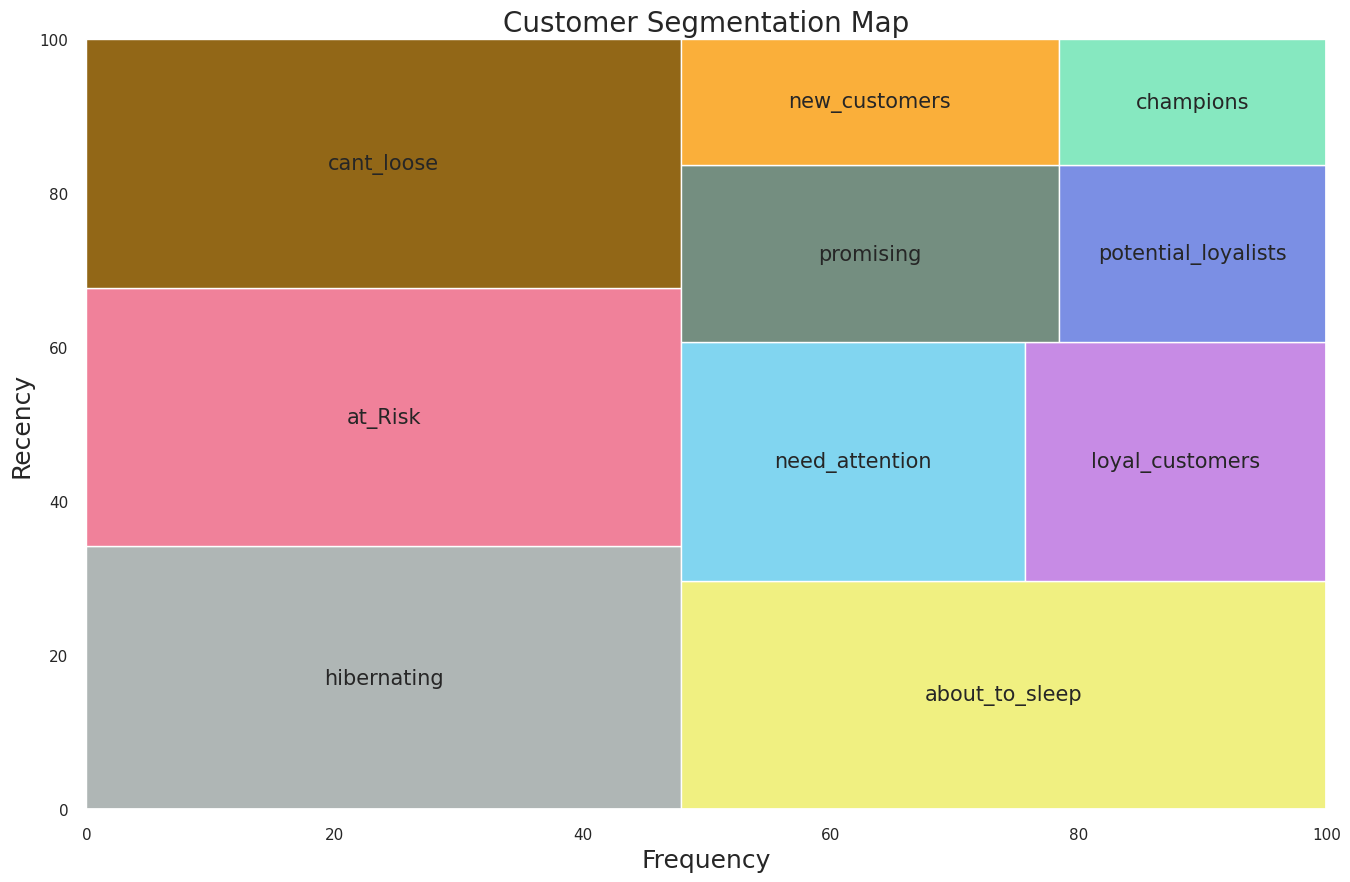

In [ ]:
import matplotlib.pyplot as plt
import squarify

segments = RFM["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

# RFM MODEL EVALUATION

Standardization
By standarizing the continous variables we make them all equally important to the analysis. This is credical because if there are large differences between the range of the numerical variables, those variable with higher range of values will dominate over those with smaller ranges.

Standardization rescales data to have a mean (𝜇) of 0 and standard deviation (𝜎) of 1 (unit variance).

Z=Value−Mean/StandardDeviation

In [ ]:
df1 = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response' , 'ID' ,'Dt_Customer'  ]
df1.drop(cols_del, axis=1 , inplace = True )
# Standardization
for i in df1.select_dtypes(exclude='object').columns:
    df1.loc[:, i] = StandardScaler().fit_transform(np.array(df1[[i]]))

KeyError: ignored

#Modeling clusters


In [ ]:
df1.columns   # Columns names

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Day_Engaged', 'Age', 'Children', 'Has_Children',
       'Monatery', 'TotalPurchases', 'Accepted_Campaign'],
      dtype='object')

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
#Choosing optimal K
K = range(1,15)
cost = []
for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(df1, categorical=[1,2])
    cost.append(kproto.cost_)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Determining optimal number of clusters (K)
num_clusters = range(1, 15)
cluster_costs = []

for k in num_clusters:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(df1, categorical=[1, 2])
    cluster_costs.append(kproto.cost_)



<ipython-input-206-a89c83117aac>:3: UserWarning:

linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.

<ipython-input-206-a89c83117aac>:3: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.



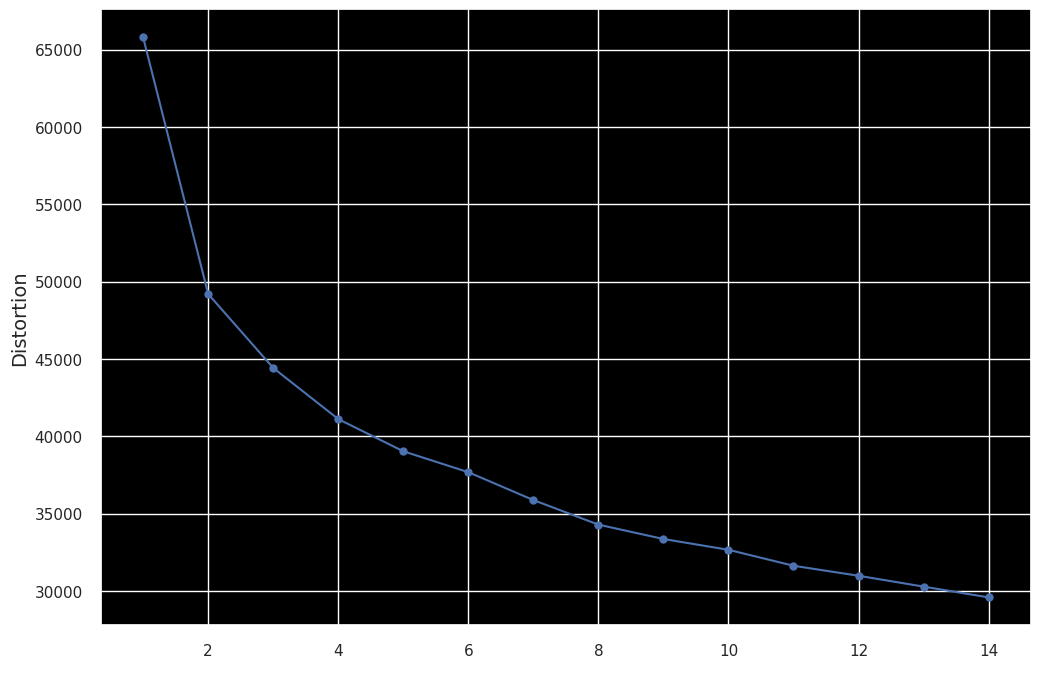

In [ ]:
fig, ax = plt.subplots(figsize =(12, 8))

plt.plot(K, cost, 'bo-', marker='o', linestyle='-')
plt.xlabel('k', color = 'white', size = 14)
plt.ylabel('Distortion', size = 14)
plt.tick_params(axis='x')
plt.tick_params(axis='y')



In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    #Create KMeans instance for different number of clusters

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])       #Fit the visualizer
    visualizer.fit(X)

In [ ]:
kproto = KPrototypes(n_clusters= 4, init='Cao', n_jobs = 4)
clusters = kproto.fit_predict(df1, categorical=[1,2])

In [ ]:
# Merging original data with clusters
df_clusters = pd.concat([df, pd.DataFrame({'cluster': clusters})], axis=1)

In [ ]:
df

ConversionError: ignored

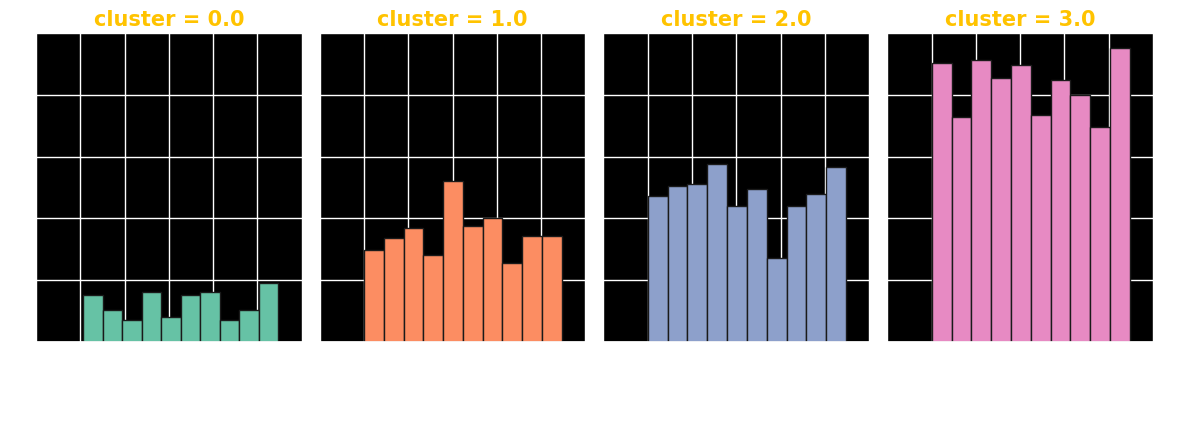

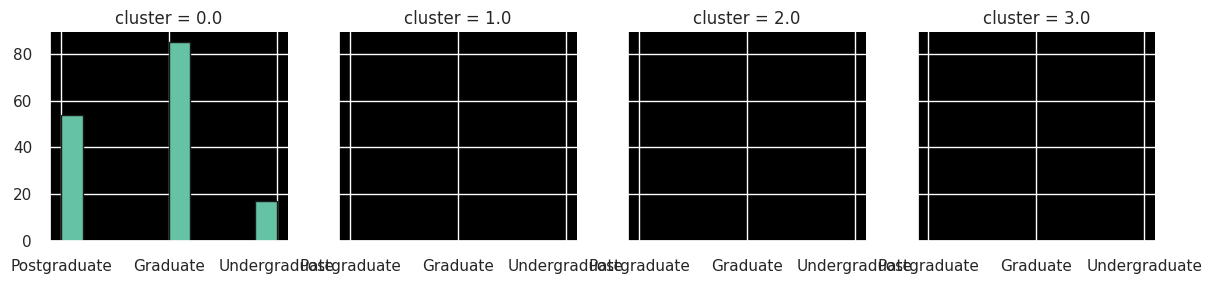

In [ ]:
# Clusters interpretation


for i in df_clusters:
    g = sns.FacetGrid(df_clusters, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k")
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5)

# Clustring

Clustering
Finally, down to clustering. In this case I’ll try using K-means and agglomerative clustering

K-means